<font size="6"><strong><center>Iris Dataset - Exploratory Data Analysis</center></strong></font> 

<br>

<center><span style="font-family: Arial;font-size:1.2em">--- Ruochen Liu</center>
<center><span style="font-family: Arial;font-size:1.2em">05-2022</center>

**Requirements for working with data in scikit-learn**

1) Features  and response are **separate objects**

2) Features and response should be **numeric**

3)Features and response should be **NumPy arrays**

4)Features and response should have **specific shapes**

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Loading the Iris dataset from Scikit-learn**

In [3]:
#import iris dataset
iris = load_iris()
print(iris.data.shape)

(150, 4)


In [4]:
# no_species = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df = pd.read_csv("Iris.csv")

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### EDA
**Classification** is supervised learning in which the response is categorical


In [8]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<AxesSubplot:>

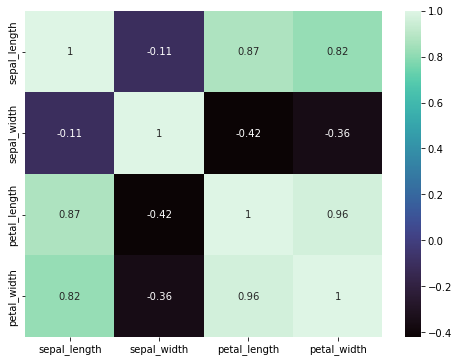

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(data=df.corr(), annot=True, cmap='mako')

Note: 
**petal width** and **petal length** are highly correlated. Same with petal length and sepal length. Sepal width shows negative corr with others, it must be important in classification.

<AxesSubplot:xlabel='species', ylabel='petal_length'>

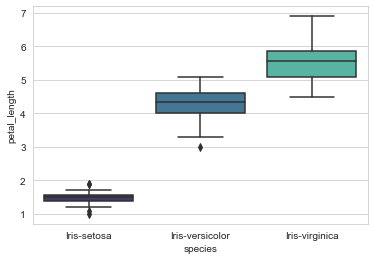

In [10]:
sns.set_style('whitegrid')
sns.boxplot(x="species", y="petal_length", data=df, palette='mako')

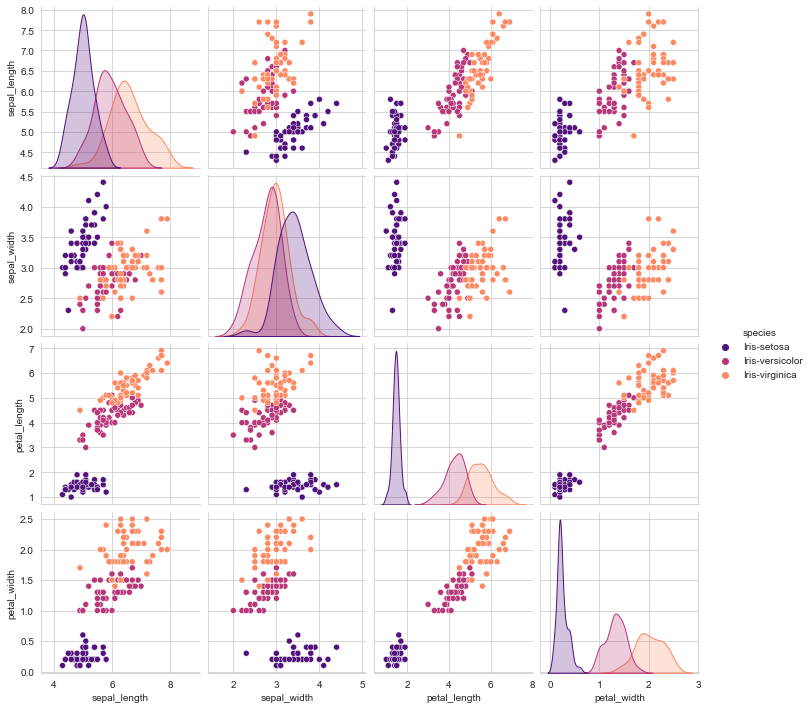

In [11]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='species', palette='magma')

<AxesSubplot:xlabel='species', ylabel='count'>

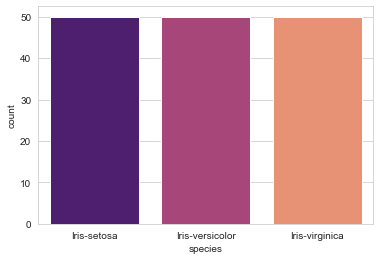

In [12]:
sns.countplot(x = 'species', data = df, palette = 'magma')

<AxesSubplot:xlabel='species', ylabel='petal_width'>

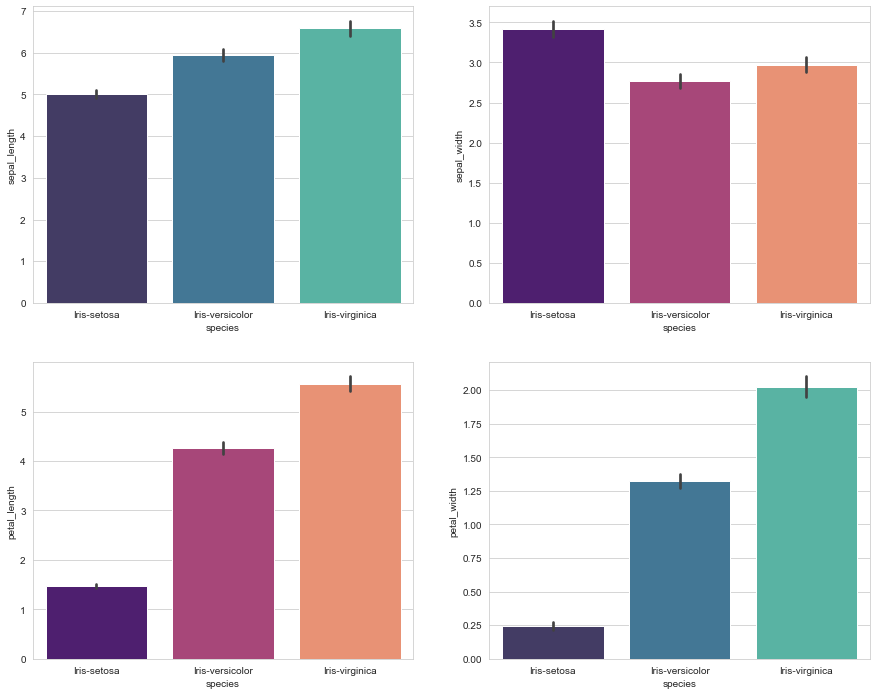

In [13]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.barplot(x='species', y='sepal_length', data=df, palette="mako")
plt.subplot(2,2,2)
sns.barplot(x='species', y='sepal_width', data=df, palette="magma")
plt.subplot(2,2,3)
sns.barplot(x='species', y='petal_length', data=df, palette="magma")
plt.subplot(2,2,4)
sns.barplot(x='species', y='petal_width', data=df, palette="mako")

 ###  Standardize features

In [14]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [15]:
scalar.fit(df.drop('species',axis=1))

StandardScaler()

In [16]:
scaled_features = scalar.transform(df.drop('species',axis=1))

In [17]:
train = pd.DataFrame(scaled_features,columns=df.columns[:-1])
train.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


### Train test split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['species'], test_size=0.3,)

### Apply KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))
    

Text(0, 0.5, 'Error Rate')

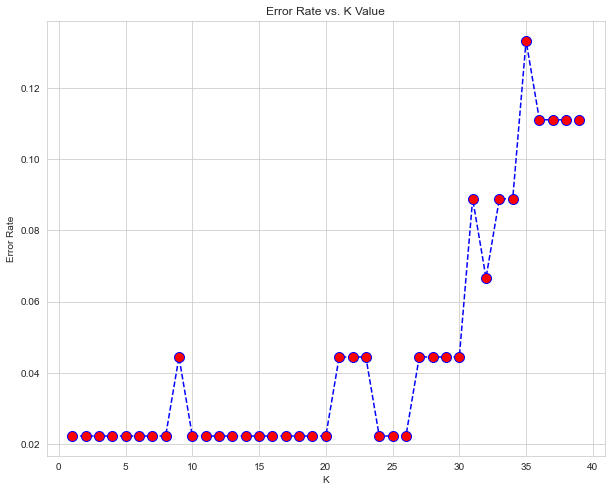

In [21]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [28]:
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print('WITH K=17 \n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=17 

[[13  0  0]
 [ 0 17  1]
 [ 0  0 14]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



**Conclusion**:<br>
From the classification method, the model can get roughly around 98%